# Diabetes Prediction Proect
author: Hajid Lutfi Hidayanto  
dataset: [kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

## Downloading Dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

!unzip diabetes-health-indicators-dataset

  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 154MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


## Importing Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

## Exploring Dataset

In [ ]:
imbalance3_df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
balance3_df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
imbalance2_df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
imbalance3_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
imbalance3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
balance3_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
balance3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
imbalance2_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
imbalance2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Decided to use the balance 3 class dataset

## Exploratory Data Analysis

In [ ]:
df = balance3_df

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

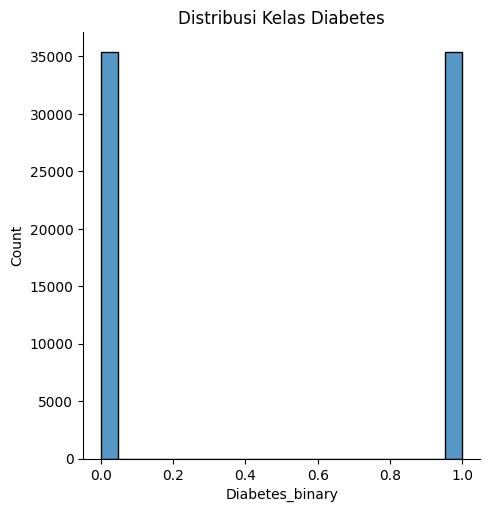

In [ ]:
sns.displot(data=df, x='Diabetes_binary')

plt.title('Distribusi Kelas Diabetes')
plt.show()

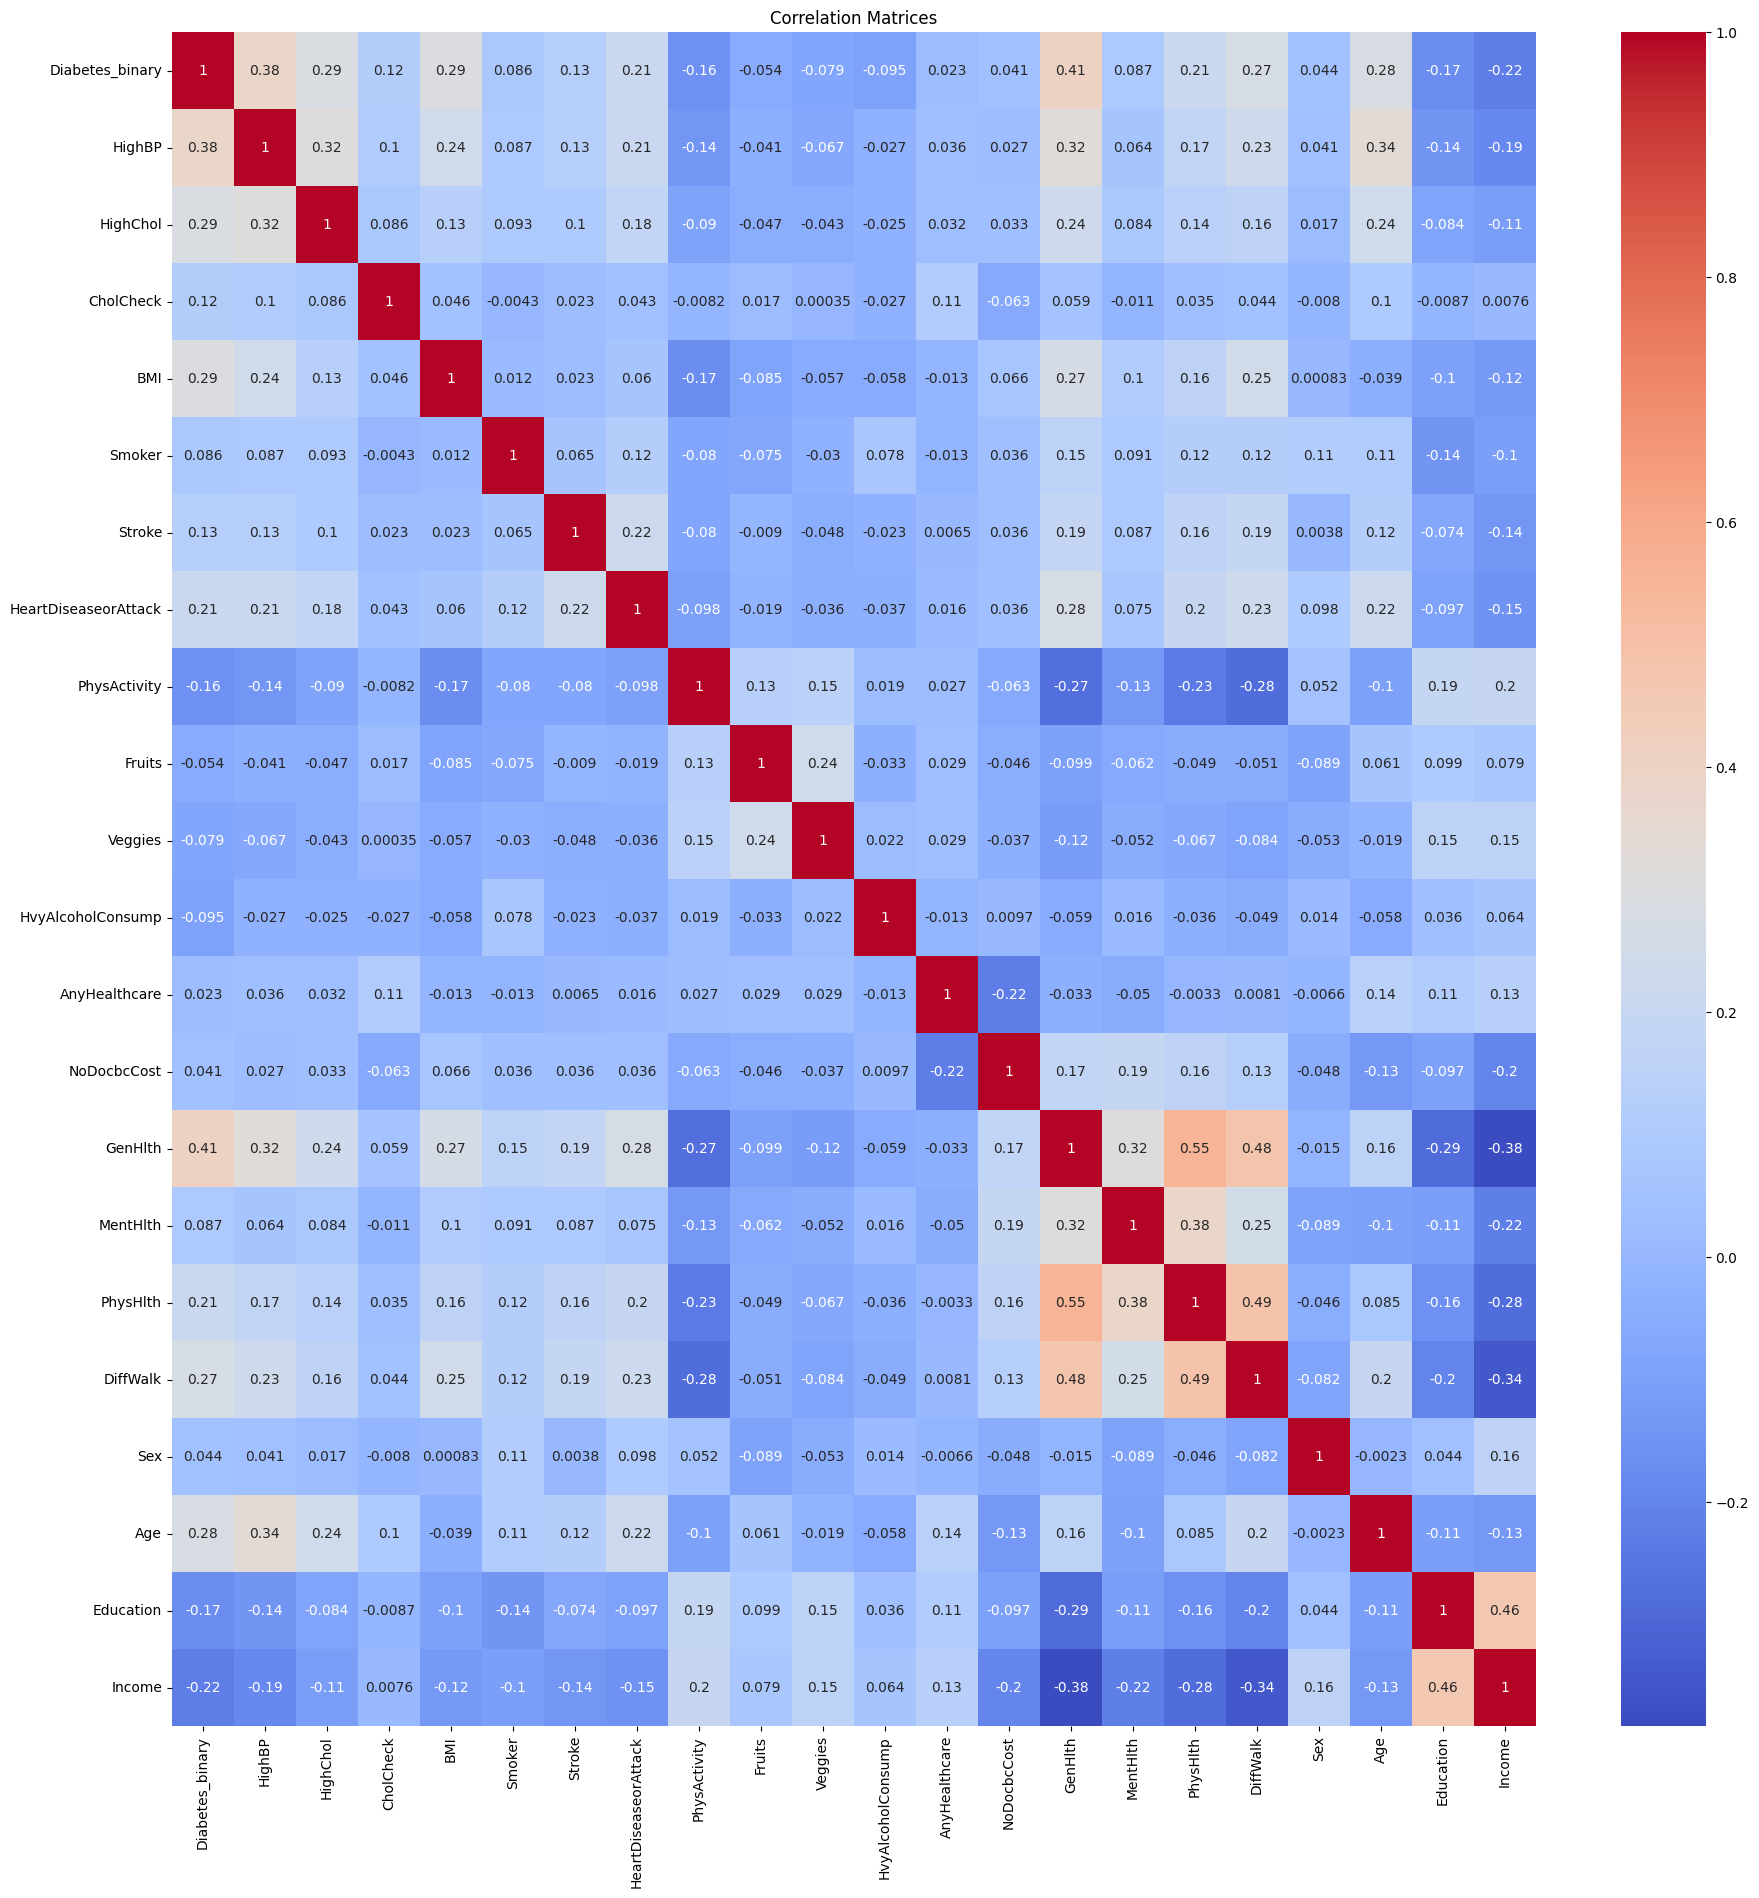

In [ ]:
plt.figure(figsize=(22, 22))
corr_matrices = df.corr()

sns.heatmap(data=corr_matrices, cmap='coolwarm', annot=True)
plt.title('Correlation Matrices')
plt.show()

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df = df.drop(columns=['Education', 'Income'])

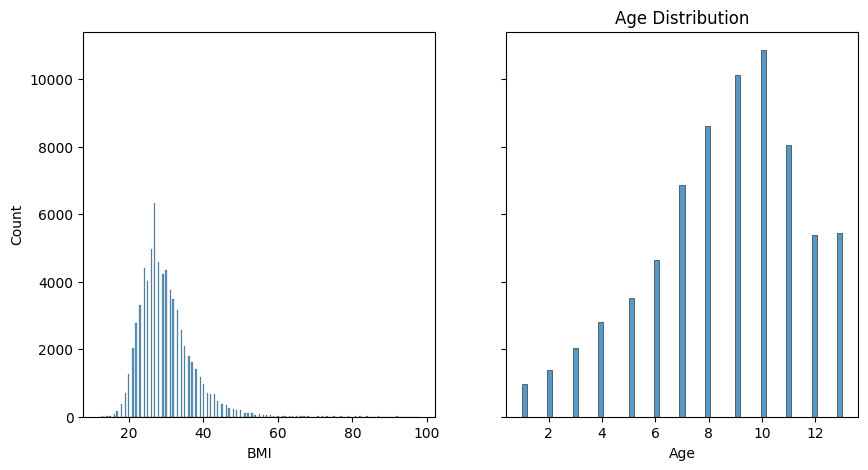

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# BMI
sns.histplot(df, x='BMI', ax=axes[0])
plt.title('BMI Distribution')

# AGE
sns.histplot(df, x='Age', ax=axes[1])
plt.title('Age Distribution')

plt.show()

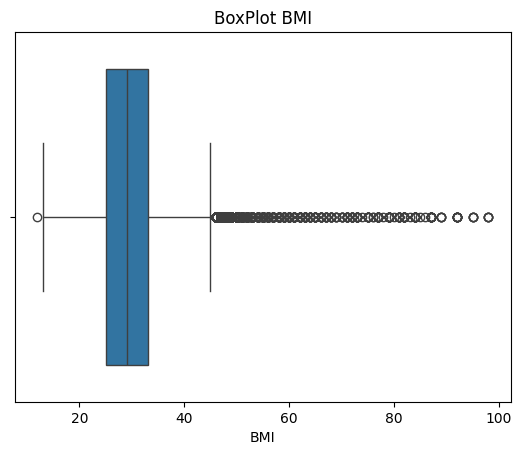

In [ ]:
sns.boxplot(df, x='BMI')
plt.title('BoxPlot BMI')

plt.show()

In [ ]:
df['BMI'][df['BMI'] > 90].count()

17

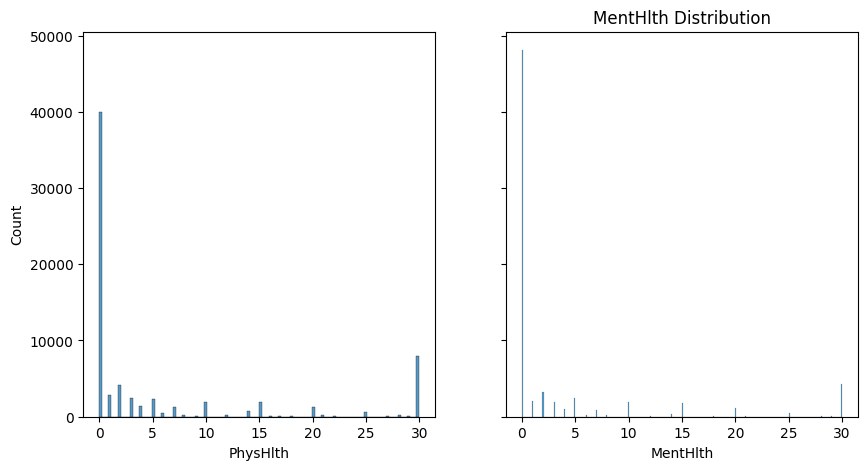

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.histplot(df, x='PhysHlth', ax=axes[0])
plt.title('PhysHlth Distribution')

sns.histplot(df, x='MentHlth', ax=axes[1])
plt.title('MentHlth Distribution')

plt.show()

## Data Preprocessing

In [ ]:
def remove_outliers_iqr(column, data=df, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + k * IQR
    lower_bound = Q1 - k * IQR

    return data[(data[column] < upper_bound) & (data[column] > lower_bound)]

In [ ]:
df = remove_outliers_iqr('BMI')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0


In [ ]:
len(df)

68130

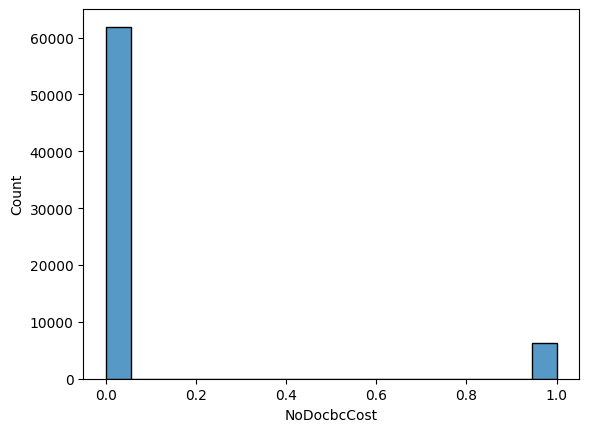

In [ ]:
sns.histplot(df,x='NoDocbcCost')
plt.show()

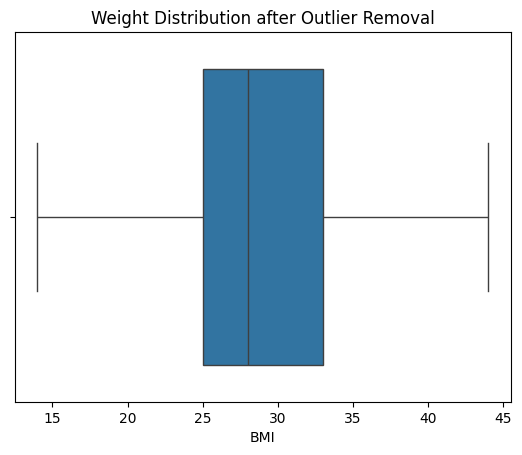

In [ ]:
sns.boxplot(df, x='BMI')
plt.title('Weight Distribution after Outlier Removal')
plt.show()

In [ ]:
all_features = df.columns.to_list()
categorical_features = all_features[:4] + all_features[5:14]  + all_features[17:19]
numerical_features = [x for x in all_features if x not in categorical_features]

In [ ]:
print(categorical_features, numerical_features)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'] ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']


In [ ]:
categorical_df = df[categorical_features]
numerical_df = df[numerical_features]

In [ ]:
categorical_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([categorical_df, numerical_df], axis=1)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,BMI,GenHlth,MentHlth,PhysHlth,Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,26.0,3.0,5.0,30.0,4.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,26.0,3.0,0.0,0.0,12.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,26.0,1.0,0.0,10.0,13.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,28.0,3.0,0.0,3.0,11.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,29.0,2.0,0.0,0.0,8.0


In [ ]:
len(df.columns)

20

In [ ]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## Modeling

In [ ]:
parameters = {'n_estimators': [50, 100, 150],
              'learning_rate': [1e-2, 1e-3, 1e-4],
              'random_state': [42]
              }
baseModelAdaBoost = AdaBoostClassifier()
gridSearch = GridSearchCV(baseModelAdaBoost, parameters)
gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'n_estimators': [50, 100, 150], 'random_state': [42]})

In [ ]:
gridSearch.best_params_

{'learning_rate': 0.01, 'n_estimators': 150, 'random_state': 42}

In [ ]:
baseModelAdaBoost = AdaBoostClassifier(n_estimators=150, random_state=42)

baseModelAdaBoost.fit(X_train, y_train)
predictions = baseModelAdaBoost.predict(X_test)

print(classification_report(y_pred=predictions, y_true=y_test, target_names=['non-diabetes', 'diabetes']))

              precision    recall  f1-score   support

non-diabetes       0.75      0.74      0.75      6870
    diabetes       0.74      0.75      0.75      6756

    accuracy                           0.75     13626
   macro avg       0.75      0.75      0.75     13626
weighted avg       0.75      0.75      0.75     13626



In [ ]:
lr = SGDClassifier()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print(classification_report(y_pred=predictions, y_true=y_test, target_names=['non-diabetes', 'diabetes']))

              precision    recall  f1-score   support

non-diabetes       0.79      0.66      0.72      6870
    diabetes       0.71      0.82      0.76      6756

    accuracy                           0.74     13626
   macro avg       0.75      0.74      0.74     13626
weighted avg       0.75      0.74      0.74     13626



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(None, X_train.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
target_accuracy = 0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > target_accuracy and logs.get('val_accuracy') > target_accuracy):
      print(f"\nAkurasi telah mencapai > {target_accuracy * 100}%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics= ['accuracy']
              )

In [ ]:
modelHistory = model.fit(
                X_train, y_train,
                epochs=30,
                validation_data=(X_test, y_test),
                callbacks=[callbacks],
                verbose=2)

Epoch 1/30
1704/1704 - 9s - loss: 0.6580 - accuracy: 0.6304 - val_loss: 0.6117 - val_accuracy: 0.6851 - 9s/epoch - 5ms/step
Epoch 2/30
1704/1704 - 5s - loss: 0.5815 - accuracy: 0.7044 - val_loss: 0.5553 - val_accuracy: 0.7202 - 5s/epoch - 3ms/step
Epoch 3/30
1704/1704 - 6s - loss: 0.5466 - accuracy: 0.7257 - val_loss: 0.5364 - val_accuracy: 0.7304 - 6s/epoch - 3ms/step
Epoch 4/30
1704/1704 - 5s - loss: 0.5346 - accuracy: 0.7306 - val_loss: 0.5291 - val_accuracy: 0.7344 - 5s/epoch - 3ms/step
Epoch 5/30
1704/1704 - 5s - loss: 0.5297 - accuracy: 0.7354 - val_loss: 0.5259 - val_accuracy: 0.7361 - 5s/epoch - 3ms/step
Epoch 6/30
1704/1704 - 6s - loss: 0.5267 - accuracy: 0.7374 - val_loss: 0.5239 - val_accuracy: 0.7381 - 6s/epoch - 3ms/step
Epoch 7/30
1704/1704 - 5s - loss: 0.5252 - accuracy: 0.7385 - val_loss: 0.5224 - val_accuracy: 0.7376 - 5s/epoch - 3ms/step
Epoch 8/30
1704/1704 - 7s - loss: 0.5240 - accuracy: 0.7391 - val_loss: 0.5211 - val_accuracy: 0.7383 - 7s/epoch - 4ms/step
Epoch 9/

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=150, objective='binary:logistic')

xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      6870
         1.0       0.73      0.77      0.75      6756

    accuracy                           0.74     13626
   macro avg       0.74      0.74      0.74     13626
weighted avg       0.74      0.74      0.74     13626



In [ ]:
parameters = {'n_estimators': [150, 50, 20],
              'objective': ['binary:logistic'],
              'learning_rate': [1e-1, 1, 1e-5]
              }

xgb = xgb.XGBClassifier()
gridSearchXgb = GridSearchCV(xgb, parameters)
gridSearchXgb.fit(X_train, y_train)

gridSearchXgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 50, 'objective': 'binary:logistic'}

In [ ]:
# pip install xgboost==1.2.0

import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=50, objective='binary:logistic', learning_rate=0.1)

xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75      6870
         1.0       0.73      0.78      0.76      6756

    accuracy                           0.75     13626
   macro avg       0.75      0.75      0.75     13626
weighted avg       0.75      0.75      0.75     13626



In [ ]:
xgb_model.save_model('xgboost_diabetes.model')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:57:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
import pickle
model_path = "xgboost_diabetes.pickle"  # Specify the path where you want to save the model
with open(model_path, 'wb') as f:
    pickle.dump(xgb_model, f)

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age'],
      dtype='object')